In [42]:
# Importing the libraries 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
# Creating/reading data frame 

df = pd.read_csv("student_scores.csv")

# Display the top 5 rows 

df.head()

In [ ]:
# Data info

df.info()

In [ ]:
# descriptive statistics of the dataset  

df.describe()

<Figure size 864x432 with 0 Axes>

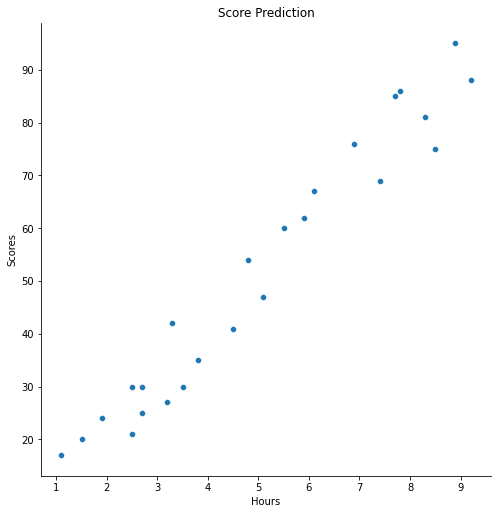

In [46]:
# Plot before linear regression 

plt.figure(figsize=(12,6))
sns.pairplot(df,x_vars=['Hours'],y_vars=['Scores'],height=7,kind='scatter')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Score Prediction')
plt.show()

In [ ]:
# The plot shows a linear relationship before the regression 


In [47]:
# Creating a new Pandas df for the X feature  

X = df[['Hours']]
X.head()


,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [48]:
# Data type for X 

type(X)

pandas.core.frame.DataFrame

In [49]:
# Crating a new Pandas series for y

y = df['Scores']
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

In [50]:
# Checking data type of y

type(y)

pandas.core.series.Series

In [51]:
# Import segregating data, linear regresion model. 
# Splitting the data for train and test 

from sklearn.model_selection import  train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.25,random_state=0)
from sklearn.linear_model import LinearRegression

# Fitting the model 

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [52]:
# Score prediction for the test values 

y_pred = lr.predict(X_test)

In [53]:
# Intercept and coeff of the line

print('Intercept of the model: ',lr.intercept_)
print('Coefficient of the line: ',lr.coef_)

Intercept of the model:  0.42760522121224653
Coefficient of the line:  [9.8255288]


In [54]:
# Calculating accuracy metrics

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.102025407722985
Mean Squared Error: 31.249552089861744
Root Mean Squared Error: 5.5901298813052405


In [55]:
# Coefficient determination (R^2)

print('r square:',metrics.r2_score(y_test,y_pred))

r square: 0.9478707230647945


In [ ]:
# r square of .95 means that the regresion is almost a perfect fit 


In [56]:
# Intercept 

print('Intercept: ', lr.intercept_)
features = pd.DataFrame(lr.coef_, X.columns, columns=['coefficient'])
features.head()

Intercept:  0.42760522121224653


,coefficient
Hours,9.825529


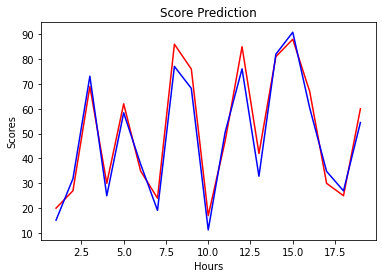

In [57]:
# Plot of  actual vs predicted values

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-')
plt.plot(c,y_pred,color='b',linestyle='-')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Score Prediction')
plt.show()

In [ ]:
# The test (red)  and the prediction (blue) data plot it's almost identical which means 
# that the model is a good fit  

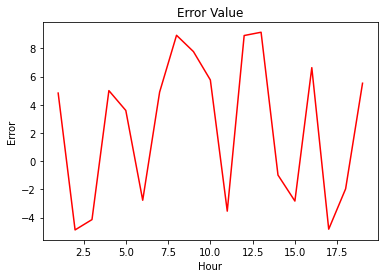

In [58]:
# plotting the error

c = [i for i in range(1,len(y_test)+1,1)]
plt.plot(c,y_test-y_pred,color='red',linestyle='-')
plt.xlabel('Hour')
plt.ylabel('Error')
plt.title('Error Value')
plt.show()